Email Spam Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [2]:
data=pd.read_csv(r'spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop('Unnamed: 2',axis=1,inplace=True)
data.drop('Unnamed: 3',axis=1,inplace=True)
data.drop('Unnamed: 4',axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={"v1": "detection"}, inplace=True)
data.rename(columns={"v2": "message"}, inplace=True)
data.columns

Index(['detection', 'message'], dtype='object')

In [8]:
data.isnull().sum()

detection    0
message      0
dtype: int64

In [9]:
data.detection.value_counts()

detection
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
data.shape

(5572, 2)

In [11]:
data.describe()

,detection,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   detection  5572 non-null   object
 1   message    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data.duplicated().sum()

403

In [14]:
data = data.drop_duplicates(keep = 'first')

In [15]:
data.duplicated().sum()
     

0

In [16]:
data = data.reset_index(drop = True)
data

,detection,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [17]:
data.shape

(5169, 2)

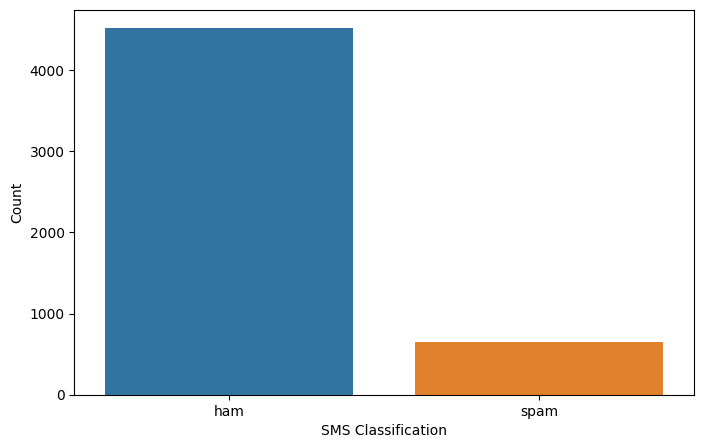

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='detection', data=data)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

Cleaning of messages

In [19]:


def clean_message(message):
    # Remove special characters and numbers
    message = re.sub(r'[^\w\s]', '', message)
    message = re.sub(r'\d+', '', message)
    
    # Convert text to lowercase
    message = message.lower()
    
    # Tokenize the message into words
    words = word_tokenize(message)
    #tokenize means breaking down in units
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Join the words back into a cleaned message
    cleaned_message = ' '.join(words)
    
    return cleaned_message



In [20]:
data['Clean Email'] = data['message'].apply(clean_message)
data

,detection,message,Clean Email
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u å pound prize claim ...
5165,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5166,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5167,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [21]:
data.columns

Index(['detection', 'message', 'Clean Email'], dtype='object')

Generating Word Cloud

In [22]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'White')
     

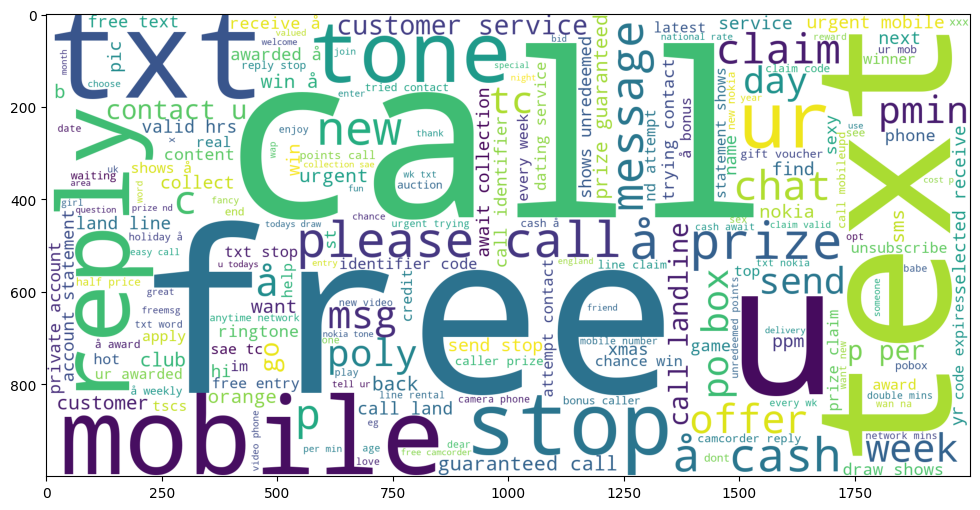

In [23]:
spam_ = wc.generate(data[data['detection']=='spam']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_);

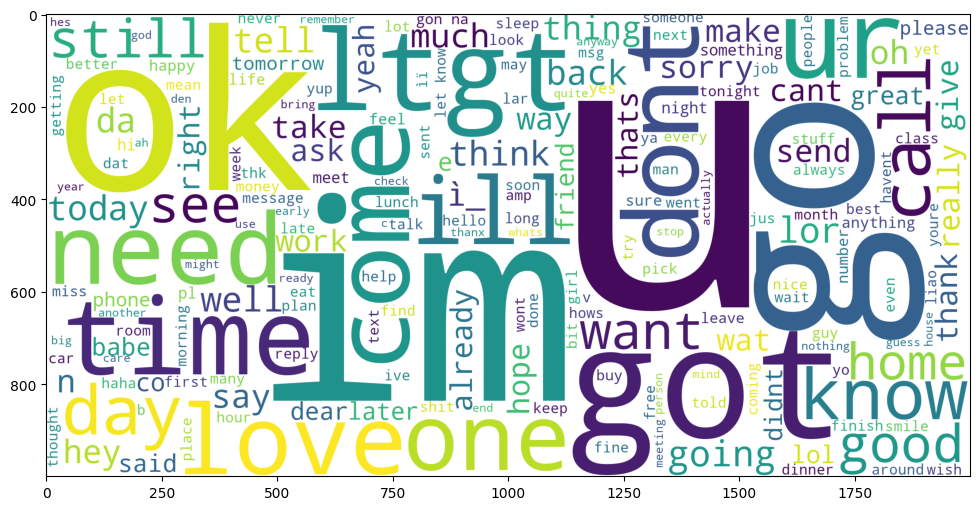

In [24]:
ham_ = wc.generate(data[data['detection']=='ham']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_);

Encoding Detection in numeric values

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(data['Clean Email']).toarray()
y = data['detection'].copy

In [26]:
from sklearn.preprocessing import LabelEncoder
lf = LabelEncoder()
y = lf.fit_transform(data['detection'])

In [27]:
y

array([0, 0, 1, ..., 0, 0, 0])

Spliting of data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [29]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (4135, 2500)
X_test shape: (1034, 2500)
y_train shape: (4135,)
y_test shape: (1034,)


Building model using Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
     

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8771760154738878
[[787 109]
 [ 18 120]]
Precision Score 0.5240174672489083


In [32]:

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")
                    

Accuracy Score: 0.971953578336557
[[884  12]
 [ 17 121]]
Precision Score 0.9097744360902256


In [33]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9796905222437138
[[895   1]
 [ 20 118]]
Precision Score 0.9915966386554622
